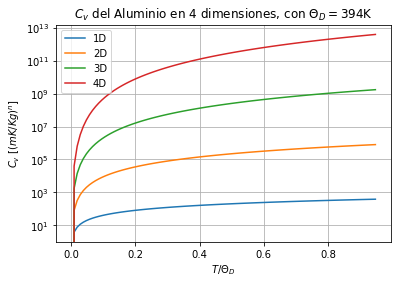

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpmath import zeta

T = np.linspace(0, 373.15, 100) # Rango de valores de temperatura
cs = 1 #343.2  # m/s
hbarr= 1# 1,054 571 817 × 10-34	J⋅s
L = 5  # m
dimensions = [1,2,3,4]
Kb = 1 #1,380649 × 10−23 J/K
N=20
Theta_D= 394 # K Aluminio

def specificheat(V,n,Kb,T,cs,hbarr):
    cv=(2*V/(2*np.pi**(0.5))**n)*((math.gamma(n+1)*(zeta(n+1)))/(math.gamma(n/2)))*((n+1)/(cs*hbarr)**n)*((Kb)**(n+1))*(T**n)
    return cv

for i, dimension in enumerate(dimensions):
    V = L ** i
    Cv = specificheat(V, dimension, Kb, T,cs,hbarr)
    plt.plot(T/Theta_D, Cv, label=f"{dimension}D")

plt.xlabel("$T/\Theta_D$")
plt.ylabel("$C_v$ [$(mK/Kg)^{n}$]")
plt.yscale('log') 
plt.title("$C_v$ del Aluminio en 4 dimensiones, con $\Theta_D=$"+str(Theta_D)+"K")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("cvaluminio vs T.jpg")

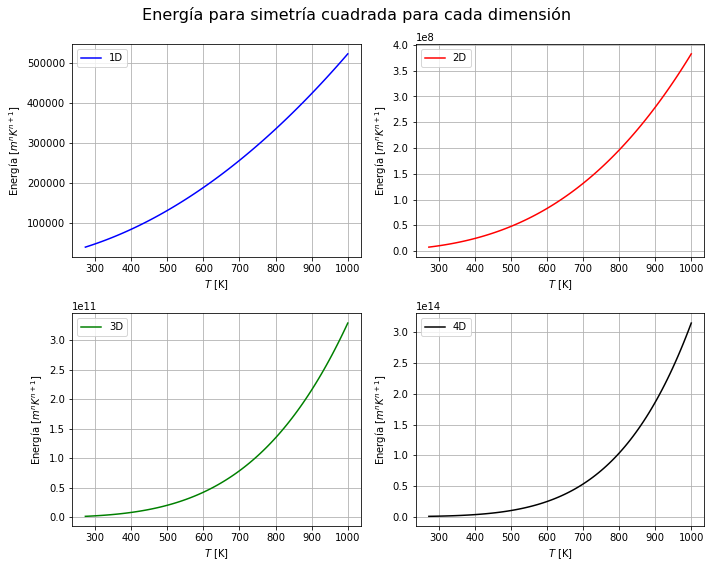

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpmath import zeta

omega = np.linspace(0, 5, 100)  # Rango de valores de omega
cs = 1  # 343.2  # m/s
L = 1  # m
dimensions = [1, 2, 3, 4]
Kb = 1  # 1,380649 × 10−23 J/K
hbarr = 1  # 1,054 571 817 × 10-34	J⋅s
T = np.linspace(273, 1000, 100)  # Rango de valores de temperatura

def Energia(V, n, hbarr, Kb, T):
    U = (2 * V / (2 * np.pi**(0.5))**n) * (hbarr / math.gamma(n/2)) * (1 / cs**n) * (Kb * T / hbarr)**(n+1) * (math.gamma(n+1)) * (zeta(n+1))
    return U

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colors = ["blue", "red", "green", "black"]  # Colores para cada gráfica

for i, dimension in enumerate(dimensions):
    V = L ** dimension
    U = Energia(V, dimension, hbarr, Kb, T)
    row = i // 2  # Fila del subplot
    col = i % 2   # Columna del subplot
    axs[row, col].plot(T, U, label=f"{dimension}D", color=colors[i])  # Asignar color a la gráfica
    axs[row, col].set_xlabel("$T$ [K]")
    axs[row, col].set_ylabel("Energía [$m^{n}K^{n+1}$]")
    #axs[row, col].set_title("Energía para simetría cuadrada en f"{dimension}D")
    axs[row, col].legend()
    axs[row, col].grid(True)
    # axs[row, col].set_yscale('log')  # Cambiar a escala logarítmica en el eje y
    fig.suptitle("Energía para simetría cuadrada para cada dimensión", fontsize=16)

plt.tight_layout()
plt.savefig("U(T)vsT.jpg")



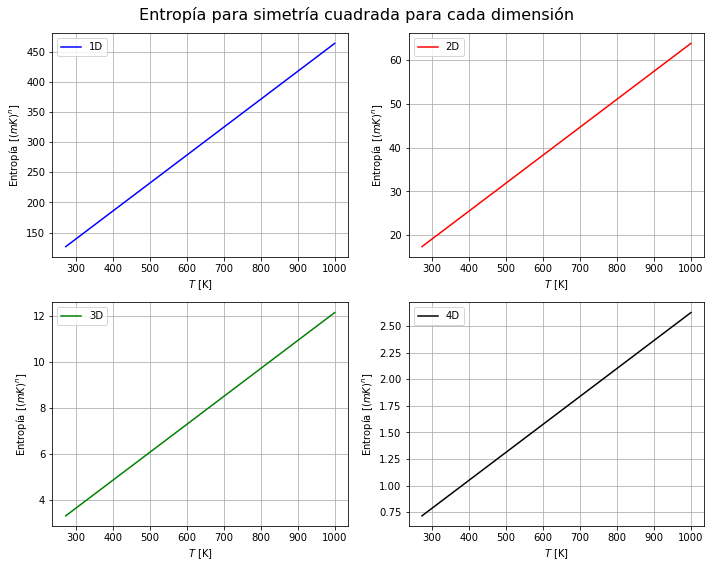

In [4]:
def entropia(V,n,Kb,T,cs,hbarr):
    S=(2*V/(2*np.pi**(0.5))**n)*((math.gamma(n+1)*(zeta(n+1)))/(math.gamma(n+2)))*(1/(cs*hbarr)**n)*((Kb)**(n+1))*(T)
    return S
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

colors = ["blue", "red", "green", "black"]  # Colores para cada gráfica

for i, dimension in enumerate(dimensions):
    V = L ** dimension
    S = entropia(V, dimension,Kb,T,cs,hbarr)
    row = i // 2  # Fila del subplot
    col = i % 2   # Columna del subplot
    axs[row, col].plot(T, S, label=f"{dimension}D", color=colors[i])  # Asignar color a la gráfica
    axs[row, col].set_xlabel("$T$ [K]")
    axs[row, col].set_ylabel("Entropía [$(m K)^{n}$]")
    #axs[row, col].set_title("Energía para simetría cuadrada en f"{dimension}D")
    axs[row, col].legend()
    axs[row, col].grid(True)
    # axs[row, col].set_yscale('log')  # Cambiar a escala logarítmica en el eje y
    fig.suptitle("Entropía para simetría cuadrada para cada dimensión", fontsize=16)

plt.tight_layout()
plt.savefig("S(T)vsT.jpg")